In [1]:
import pandas as pd # standard python data library
import geopandas as gp # the geo-version of pandas
import numpy as np 
import os
import fiona
from statistics import mean, median
from pandas import read_csv
gp.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw' #To load KML files

# VEST PA Validation

In [2]:
vest_pa_18 = gp.read_file("./raw-from-source/VEST/pa_2018/pa_2018.shp")

Election results from the Pennsylvania Secretary of State's office via OpenElections (https://github.com/openelections/openelections-data-pa/). Precinct data was corrected with canvass reports for the following counties: Berks, Blair, Bradford, Cambria, Carbon, Crawford, Elk, Forest, Franklin, Lawrence, Lycoming, Mifflin, Montgomery, Montour, Northumberland, Susquehanna. The candidate totals for Berks, Blair, Crawford, and Mifflin differ from the county totals reported by the state and therefore the statewide totals differ from the official results accordingly.

Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release. The shapefiles from Delaware County and the City of Pittsburgh are from the respective jurisdictions instead. Precinct numbers were corrected to match the voter file in the following locales: Allegheny (Elizabeth, Pittsburgh W12), Blair (Greenfield), Bradford (Athens), Greene (Nonongahela), Monroe (Smithfield), Montgomery (Hatfield), Northampton (Bethlehem Twp), Perry (Toboyne), Washington (New Eagle, Somerset), York (Fairview).

Precinct boundaries throughout the state were edited to match voter assignments in the PA Secretary of State voter file from the 2018 election cycle. While some edits reflect official updates to wards or divisions the great majority involve voters incorrectly assigned to voting districts by the counties. As such the VEST shapefile endeavors to reflect the de facto precinct boundaries and these often differ from the official voting district boundaries, in some cases quite drastically. Wherever possible edits were made using census boundaries or alternatively using the parcel shapefiles from the respective counties. 

In certain areas voter assignments appear so erratic that it is impractical to place all voters within their assigned precinct. These areas were edited so as to place as many voters as possible within their assigned precinct without displacing a greater number from their assigned precinct. In general, municipal boundaries were retained except where significant numbers of numbers were misassigned to the wrong municipality. In cases where the odd/even split was incorrectly reversed for precinct boundary streets the official boundary was retained. All such cases involved near equal number of voters swapped between voting districts.

The following revisions were made to the base shapefiles to match the de facto 2018 precinct boundaries consistent with the voter file. Individual precincts are noted in cases of splits or merges. Due to the sheer number of edits boundary adjustments are noted at the borough/township level. There may be as many as two dozen individual precincts that were revised within a given municipality.

Adams: Adjust Cumberland, Franklin  
Allegheny: Merge CD splits for S Fayette 3/5; Split Pittsburgh W5 11/17; Merge Pittsburgh W16 9/11/12, Align   McCandless with municipal boundary; Adjust Avalon, Baldwin, Bethel Park, Braddock, Brentwood, Castle Shannon, Clairton, Collier, Coraopolis, Crescent, Dormont, Dravosburg, Duquesne, E Deer, E McKeesport, E Pittsburgh, Elizabeth, Emsworth, Forward, Glassport, Hampton, Harmar, Ingram, Jefferson Hills, Kennedy, Leet, Liberty, Marshall, McCandless, McKees Rocks, McKeesport, Monroeville, Moon, Mount Lebanon, Munhall, N Fayette, N Versailles, O'Hara, Oakdale, Penn Hills, Pine, Pittsburgh (nearly all wards), Pleasant Hills, Reserve, Richland, Ross, Scott, Sewickley, Shaler, S Fayette, S Park, Stowe, Swissvale, Upper St. Clair, W Deer, W Homestead, W Mifflin, W View, Whitaker, Whitehall, Wilkins, Wilkinsburg
Armstrong: Align Dayton, Elderton, Ford City, Kittanning, N Apollo with municipal boundaries; Adjust Ford City, Gilpin, Kiskiminetas, Kittanning, Manor, N Buffalo, Parks, Parker City, S Buffalo  
Beaver: Adjust Aliquippa, Ambridge, Baden, Beaver, Brighton, Center, Chippewa, Conway, Economy, Franklin, Hanover, Harmony, Hopewell, Midland, Monaca, N Sewickley  
Bedford: Adjust Bedford Boro, Bedford Twp  
Berks: Adjust Cumru, Douglass, Oley, Maxatawny, Robeson, Sinking Spring, Spring, Union  
Blair: Merge Tunnelhill/Allegheny Twp 4; Align Altoona, Bellwood, Duncansville, Hollidaysburg, Newry, Roaring Spring, Tyrone, Williamsburg with municipal boundaries; Adjust Allegheny, Altoona, Antis, Frankstown, Freedom, Greenfield, Huston, Juniata, N Woodbury, Logan, Snyder, Tyrone Boro, Tyrone Twp  
Bucks: Align Sellersville, Tullytown with municipal boundaries; Adjust Bensalem, Bristol Boro, Bristol Twp, Buckingham, Doylestown Twp, Falls, Hilltown, Lower Makefield N, Lower Southampton E, Middletown, Milford, Morrissville, Newtown Twp, Northampton, Solebury Lower, Solebury, Springfield, Tinicum, Upper Makefield, Upper Southampton E, Warminster, Warrington, W Rockhill  
Butler: Merge CD splits for Cranberry E 2, 3, Cranberry W 1, 2, Jefferson 1, 2; Align Butler Twp, Valencia with municipal boundaries; Adjust Adams, Buffalo, Butler Boro, Butler Twp, Center, Cranberry E, Cranberry W, Jackson, Jefferson, Zelienople
Cambria: Align Daisytown, Sankertown, W Taylor, Wilmore with municipal boundaries; Adjust Cambria, Conemaugh, Croyle, E Taylor, Ebensburg, E Carroll, Geistown, Jackson, Johnstown W8, W17, W20, Lower Yoder, Northern Cambria, Portage Boro, Portage Twp, Richland, Southmont, Stonycreek, Summerhill, Susquehanna, Upper Yoder, W Carroll, Westmont
Cameron: Adjust Emporium, Shippen
Carbon: Adjust Jim Thorpe, Kidder, Mahoning, New Mahoning, Summit Hill
Centre: Merge CD splits for Halfmoon E Central/Proper; Merge Ferguson Northeast 1 A/B; Adjust Benner, College, Ferguson, Patton
Chester: Merge CD/LD splits for Birmingham 2, Phoenixville M 1; Adjust Birmingham, E Bradford S, E Fallowfield, E Goshen, E Marlborough, Easttown, N Coventry, Spring City, Tredyffrin M, Uwchlan, W Bradford, W Caln, W Goshen N, W Goshen S, Westtown
Clarion: Merge Emlenton/Richland; Adjust Clarion, Highland, Farmington, Knox
Clearfield: Adjust Bradford, Cooper, Decatur, Golden Rod, Lawrence Glen Richie, Morris, Plympton, Woodward
Columbia: Merge Ashland/Conyngham; Adjust Orange, Scott West
Crawford: Align Mead, Woodcock with municipal boundaries
Cumberland: Merge CD splits for N Middleton 1, 3; Split Lower Allen 1/Annex; Align Carlisle, E Pennsboro, Hampton, Lemoyne, Lower Allen, Mechanisburg, Middlesex, Mount Holly Springs, N Middleton, Shiremanstown, Silver Spring, W Pennsboro, Wormsleysburg with municipal boundaries
Dauphin: Align Middletown with municipal boundary; Adjust Derry, Harrisburg W1, W7, W8, W9, Hummelstown, Lower Paxton, Lykens, Middletown
Delaware: Adjust Chester, Concord, Darby Boro, Darby Twp, Haverford, Marple, Nether Providence, Newtown, Radnor, Ridley, Sharon Hill, Thornbury, Tinicum, Trainer, Upper Chichester, Upper Darby, Upper Providence
Elk: Split N/S Horton; Adjust Johnsonburg, Ridgeway Boro, Ridgeway Twp, St. Marys
Erie: Adjust Erie W1, W4, W5, W6, Greene, Lawrence Park, McKean, Millcreek, North East
Fayette: Align Dunbar with municipal boundary; Adjust Brownsville, Bullskin, Dunbar, Georges, German, Luzerne, N Union, Redstone
Franklin: Align Mercersburg with municipal boundary; Adjust Antrim, Fannett, Greene, Guilford, Hamilton, Metal, Peters, Quincy, St. Thomas, Southampton, Washington
Fulton: Align McConnellsburg with municipal boundary
Greene: Align Carmichaels with municipal boundary; Adjust Cumberland, Dunkard, Franklin, Jefferson, Lipencott, Mather, Morgan Chart, Monongahela, Nemacolin
Huntingdon: Merge CD splits for Penn; Adjust Huntingdon, Mount Union
Jefferson:  Align Reynoldsville with municipal boundary; Adjust Punxsutawney
Lackawanna: Adjust Archbald, Blakely, Carbondale, Clarks Summit, Dickson City, Dunmore, Fell, Jermyn, Jessup, Mayfield, Moosic, Old Forge, Olyphant, Scranton W1, W2, W3, W6, W7, W10, W12, W13, W14, W15, W16, W19, W20, W23, S Abington, Taylor, Throop
Lancaster: Split Lancaster 7-8 CV/LS; Adjust Brecknock, Columbia, E Hempfield, E Lampeter, E Petersburg, Elizabethtown, Ephrata, Lancaster W4, W8, Lititz, Manheim, Manor, Millersville, Mt Joy Boro, Mt Joy Twp, New Holland, Penn, Providence, Rapho, Warwick, W Cocalico, W Donegal, W Hempfield
Lawrence: Adjust Neshannock
Lebanon: Adjust Jackson, Lickdale, S Lebanon, Union Green Pt
Lehigh: Adjust Lower Macungie, Salisbury
Luzerne: Merge CD splits for Hazle 1; Align Avoca, Pittston with municipal boundaries; Adjust Butler, Dallas, Exeter, Foster, Freeland, Hanover, Hazle, Jenkins, Kingston Boro, Kingston Twp, Larksville, Lehman, Nanticoke, Newport, Plains, Salem, Smoyersville, W Wyoming, Wilkes-Barre
Lycoming: Align Williamsport with municipal boundary; Adjust Jersey Shore
McKean: Adjust Bradford City, Bradford Twp, Foster, Keating, Otto
Mercer: Adjust Delaware, Fredonia, Greenville, Hempfield, Hermitage, Sharon, Sharpsville, S Pymatuning, W Salem
Mifflin: Split Brown Reedsville/Church Hill
Monroe: Align E Stroudsburg with municipal boundary; Adjust E Stroudsburg, Smithfield
Montgomery: Add CD special election splits for Horsham 2-2, Perkiomen 1, Plymouth 2-3; Adjust Abington, Lower Merion, Pottstown, Springfield, Upper Moreland, Upper Merion, Upper Providence
Northampton: Align Glendon, Walnutport with municipal boundaries; Adjust Bangor, Bethlehem W2, W3, W4, W7, W9, W14, W15, Bethlehem Twp, Bushkill, Easton, Forks, Hanover, Hellertown, Lehigh, Lower Mt Bethel, Lower Saucon, Moore, Nazareth, Palmer, Plainfield, Upper Mt Bethel, Washington, Williams
Northumberland: Align Northumberland with municipal boundary; Adjust Coal, Milton, Mount Carmel W, Natalie-Strong, Northumberland, Point, Ralpho, Shamokin, Sunbury, Upper Augusta
Philadelphia: Adjust 1-19/21, 5-3/19, 7-2/3/17, 7-6/7, 9-5/6, 15-7/10, 17-20/26, 20-5/10, 21-1/15, 21-40/41, 22-21/26, 23-11/12, 25-9/17, 25-4/7/12, 25-10/12, 26-1/2, 27-7/8, 27-18/20/21, 28-1/8, 29-9/11, 29-10/17, 30-14/15, 31-5/6, 38-11/17, 38-13/20, 38-15/19, 40-12/18/19, 40-17/19, 42-3/4/7, 44-8/14, 50-3/12, 50-11/27, 52-2/6/9, 52-3/8, 57-6/7, 57-10/27, 57-17/28, 58-6/12, 62-5/19, 65-4/7, 65-11/16, 66-22/34  
Pike: Adjust Matamoras  
Potter: Adjust Galeton, Sharon  
Schuylkill: Adjust Coaldale, N Manheim, Norwegian, Porter, Pottsville
Somerset: Align New Centerville with municipal boundary; Adjust Conemaugh, Jefferson, Middlecreek, Paint, Somerset Boro  
Susquehanna: Adjust Montrose; Lanesboro, Susquehanna Depot  
Tioga: Adjust Delmar, Wellsboro  
Union: Adjust Buffalo, White Deer  
Venango: Adjust Franklin, Sugarcreek, Cornplanter, Oil City  
Warren: Adjust Conewango  
Washington: Align Allenport, Beallsville, Burgettstown, Canonsburg, Carroll, Charleroi, Claysville, Elco, Finleyville, Houston, Long Branch, McDonald, Monongahela, Speers, Twilight with municipal boundaries; Adjust Amwell, Bentleyville, California, Canonsburg, Canton, Cecil, Centerville, Chartiers, Donegal, Donora, Fallowfield, Hanover, Independence, Mount Pleasant, N Franklin, N Strabane, Peters, Robinson, Smith, Somerset, S Franklin, S Strabane, Union Washington, W Brownsville  
Wayne: Adjust Honesdale  
Westmoreland: Merge CD splits for Unity Pleasant Unity; Align Greensburg with municipal boundary; Adjust Allegheny, Arnold, Bell, Derry, E Huntingdon, Fairfield, Greensburg W1-W8, Hempfield, Jeannette, Latrobe, Ligonier, Lower Burrell, Monessen, Mount Pleasant, Murraysville, New Kensington, N Belle Vernon, N Huntingdon, Penn, Rostraver, St. Clair, Scottdale, Sewickley, S Greensburg, S Huntingdon, Trafford, Upper Burrell, Unity, Vandergrift, Washington, Youngwood  
Wyoming: Adjust Falls  
York: Merge CD splits for York Twp 5-3; Align E Prospect, Goldsboro, Jefferson, Manchester, Monaghan, Wellsville, York with municipal boundaries; Adjust Chanceford, Codorus, Conewago, Dover, Fairview, Hanover, Jackson, Lower Windsor, New Freedom, Newberry, N Codorus, Penn, Red Lion, Shrewsbury, Spring Garden, Springbettsbury, W Manchester, Windsor Boro, Windsor Twp, Wrightsville, York Twp, York W5, W6, W15  

## Load Election Results

In [3]:
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Pennsylvania"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)
fips_file["unique_ID"] =  "42" + fips_file["FIPS County"]
fips_codes = fips_file["unique_ID"].tolist()
print(fips_file["County Name"].unique())
pa_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

['Adams' 'Allegheny' 'Armstrong' 'Beaver' 'Bedford' 'Berks' 'Blair'
 'Bradford' 'Bucks' 'Butler' 'Cambria' 'Cameron' 'Carbon' 'Centre'
 'Chester' 'Clarion' 'Clearfield' 'Clinton' 'Columbia' 'Crawford'
 'Cumberland' 'Dauphin' 'Delaware' 'Elk' 'Erie' 'Fayette' 'Forest'
 'Franklin' 'Fulton' 'Greene' 'Huntingdon' 'Indiana' 'Jefferson' 'Juniata'
 'Lackawanna' 'Lancaster' 'Lawrence' 'Lebanon' 'Lehigh' 'Luzerne'
 'Lycoming' 'McKean' 'Mercer' 'Mifflin' 'Monroe' 'Montgomery' 'Montour'
 'Northampton' 'Northumberland' 'Perry' 'Philadelphia' 'Pike' 'Potter'
 'Schuylkill' 'Snyder' 'Somerset' 'Sullivan' 'Susquehanna' 'Tioga' 'Union'
 'Venango' 'Warren' 'Washington' 'Wayne' 'Westmoreland' 'Wyoming' 'York']


In [4]:
pa_election = pd.read_csv("./raw-from-source/Election_Results/openelections-data-pa-master/2018/20181106__pa__general__precinct.csv")
butler_election = pd.read_csv("./raw-from-source/Election_Results/openelections-data-pa-master/2018/counties/20181106__pa__general__butler__precinct.csv")
clearfield_election = pd.read_csv("./raw-from-source/Election_Results/openelections-data-pa-master/2018/counties/20181106__pa__general__clearfield__precinct.csv")
westmoreland_election = pd.read_csv("./raw-from-source/Election_Results/openelections-data-pa-master/2018/counties/20181106__pa__general__westmoreland__precinct.csv")

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
print(butler_election.columns)
print(clearfield_election.columns)
print(westmoreland_election.columns)
print(pa_election.columns)


Index(['county', 'precinct', 'office', 'district', 'party', 'candidate',
       'votes', 'election_day', 'absentee', 'provisional'],
      dtype='object')
Index(['county', 'precinct', 'office', 'district', 'candidate', 'party',
       'votes'],
      dtype='object')
Index(['county', 'precinct', 'office', 'district', 'candidate', 'party',
       'votes', 'absentee', 'election_day', 'emergency', 'provisional',
       'federal'],
      dtype='object')
Index(['county', 'precinct', 'office', 'district', 'candidate', 'party',
       'votes', 'absentee', 'election_day'],
      dtype='object')


In [6]:
#print(butler_election.head())
#print(clearfield_election.head())
#print(westmoreland_election.head())
pa_election = pa_election[["county","precinct","office","party","candidate","votes"]]
butler_election = butler_election[["county","precinct","office","party","candidate","votes"]]
clearfield_election = clearfield_election[["county","precinct","office","party","candidate","votes"]]
westmoreland_election = westmoreland_election[["county","precinct","office","party","candidate","votes"]]

#print(butler_election.head())
#print(clearfield_election.head())
#print(westmoreland_election.head())

other_list = [butler_election,clearfield_election,westmoreland_election]
other_df = pd.concat(other_list)
print(other_df.head())
print(other_df["county"].unique())

   county               precinct          office party          candidate  \
0  Butler  0001 ADAMS TOWNSHIP 1             NaN   NaN  Registered Voters   
1  Butler  0001 ADAMS TOWNSHIP 1             NaN   NaN       Ballots Cast   
2  Butler  0001 ADAMS TOWNSHIP 1  Straight Party   DEM         DEMOCRATIC   
3  Butler  0001 ADAMS TOWNSHIP 1  Straight Party   REP         REPUBLICAN   
4  Butler  0001 ADAMS TOWNSHIP 1  Straight Party   GRN              GREEN   

   votes  
0   3957  
1   2446  
2    521  
3    811  
4      1  
['Butler' 'Clearfield' 'Westmoreland']


In [7]:
print(pa_election["county"].unique())

lone_counties = ["Butler","Clearfield","Westmoreland"]

pa_election = pa_election[~pa_election["county"].isin(lone_counties)]
print(pa_election["county"].unique())

two_dfs_list = [other_df,pa_election]

pa_election = pd.concat(two_dfs_list)

['York' 'Philadelphia' 'Allegheny' 'Bedford' 'Butler' 'Lawrence' 'Cameron'
 'Luzerne' 'Huntingdon' 'Clearfield' 'Lancaster' 'Armstrong' 'Crawford'
 'Elk' 'Somerset' 'Lebanon' 'Warren' 'Dauphin' 'Pike' 'Forest' 'Jefferson'
 'Lehigh' 'McKean' 'Cambria' 'Westmoreland' 'Lycoming' 'Northumberland'
 'Clarion' 'Washington ' 'Venango' 'Clinton' 'Wyoming' 'Indiana'
 'Sullivan' 'Bucks' 'Erie' 'Adams' 'Fayette' 'Schuylkill' 'Delaware'
 'Chester' 'Wayne' 'Carbon' 'Blair' 'Centre' 'Monroe' 'Susquehanna'
 'Union' 'Tioga' 'Cumberland' 'Bradford' 'Potter' 'Greene' 'Fulton'
 'Juniata' 'Northampton' 'Montgomery' 'Columbia' 'Berks' 'Mercer'
 'Lackawanna' 'Perry' 'Beaver' 'Snyder' 'Montour' 'Mifflin' 'Franklin']
['York' 'Philadelphia' 'Allegheny' 'Bedford' 'Lawrence' 'Cameron'
 'Luzerne' 'Huntingdon' 'Lancaster' 'Armstrong' 'Crawford' 'Elk'
 'Somerset' 'Lebanon' 'Warren' 'Dauphin' 'Pike' 'Forest' 'Jefferson'
 'Lehigh' 'McKean' 'Cambria' 'Lycoming' 'Northumberland' 'Clarion'
 'Washington ' 'Venango' 'Clint

In [8]:
print(pa_election["county"].unique())

['Butler' 'Clearfield' 'Westmoreland' 'York' 'Philadelphia' 'Allegheny'
 'Bedford' 'Lawrence' 'Cameron' 'Luzerne' 'Huntingdon' 'Lancaster'
 'Armstrong' 'Crawford' 'Elk' 'Somerset' 'Lebanon' 'Warren' 'Dauphin'
 'Pike' 'Forest' 'Jefferson' 'Lehigh' 'McKean' 'Cambria' 'Lycoming'
 'Northumberland' 'Clarion' 'Washington ' 'Venango' 'Clinton' 'Wyoming'
 'Indiana' 'Sullivan' 'Bucks' 'Erie' 'Adams' 'Fayette' 'Schuylkill'
 'Delaware' 'Chester' 'Wayne' 'Carbon' 'Blair' 'Centre' 'Monroe'
 'Susquehanna' 'Union' 'Tioga' 'Cumberland' 'Bradford' 'Potter' 'Greene'
 'Fulton' 'Juniata' 'Northampton' 'Montgomery' 'Columbia' 'Berks' 'Mercer'
 'Lackawanna' 'Perry' 'Beaver' 'Snyder' 'Montour' 'Mifflin' 'Franklin']


Do not include the "Straight Party" votes

In [9]:
#The full file does not include the Governors results from Butler
#Clearfield does not include Senate results
#Westmoreland does not include governor results

In [10]:
#pa_election[pa_election["county"]=="Westmoreland"].to_csv("./westmoreland.csv")
#pa_election[pa_election["county"]=="Butler"].to_csv("./butler.csv")
#pa_election[pa_election["county"]=="Clearfield"].to_csv("./clearfield.csv")

In [11]:
office_changes = {'GOVERNOR':'Governor','United States Senator':"U.S. Senate"}
pa_election["office"]=pa_election["office"].map(office_changes).fillna(pa_election["office"])

In [12]:
office_list = ["U.S. Senate", 'Governor']
filtered_pa_election = pa_election[pa_election["office"].isin(office_list)]
county_changes_dict = {"Washington ":"Washington"}
filtered_pa_election["county"] = filtered_pa_election["county"].map(county_changes_dict).fillna(filtered_pa_election["county"])
filtered_pa_election["County_FIPS"]=filtered_pa_election.loc[:,"county"].map(pa_fips_dict).fillna(filtered_pa_election.loc[:,"county"])

<ipython-input-12-b62953b909e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pa_election["county"] = filtered_pa_election["county"].map(county_changes_dict).fillna(filtered_pa_election["county"])
<ipython-input-12-b62953b909e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pa_election["County_FIPS"]=filtered_pa_election.loc[:,"county"].map(pa_fips_dict).fillna(filtered_pa_election.loc[:,"county"])


In [13]:
filtered_pa_election["pivot_col"]=filtered_pa_election["County_FIPS"]+filtered_pa_election["precinct"]
filtered_pa_election["candidate"]=filtered_pa_election["candidate"].str.upper()
filtered_pa_election["candidate"] = filtered_pa_election["candidate"].str.strip()
filtered_pa_election["party"] = filtered_pa_election["party"].str.upper()


print(filtered_pa_election["party"].unique())

party_changes_dict = {"DEMOCRATIC":"DEM","REPUBLICAN":"REP","LIBERTARIAN":"LIB","GREEN":"GRN",
                     "GR":"GRN","GRE":"GRN","DEMOCRAT":"DEM"}

filtered_pa_election["party"] = filtered_pa_election["party"].map(party_changes_dict).fillna(filtered_pa_election["party"])


<ipython-input-13-3d1b8e8be9f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pa_election["pivot_col"]=filtered_pa_election["County_FIPS"]+filtered_pa_election["precinct"]
<ipython-input-13-3d1b8e8be9f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pa_election["candidate"]=filtered_pa_election["candidate"].str.upper()
<ipython-input-13-3d1b8e8be9f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

['DEM' 'REP' 'GRN' 'LIB' nan 'GR' 'GREEN' 'GRE' 'DEMOCRATIC' 'REPUBLICAN'
 'LIBERTARIAN' 'DEMOCRAT']


<ipython-input-13-3d1b8e8be9f4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pa_election["party"] = filtered_pa_election["party"].map(party_changes_dict).fillna(filtered_pa_election["party"])


In [14]:
filtered_pa_election = filtered_pa_election[~(filtered_pa_election["candidate"].str[-3:]=="(W)")]

In [15]:
candidate_name_changes = {
   'DEMOCRATIC':'DEM', 
 'REPUBLICAN':"REP",
 'GREEN':"GRN", 
 'INDEPENDENT':"IND", 
 'LIBERTARIAN':"LIB",
    
    
    'LOU BARLETTA':'BARLETTA',
 'LOU  BARLETTA':'BARLETTA',
 'LOU BARLETTA JR':'BARLETTA',
 'BARLETTA, LOU':'BARLETTA',

    'KEN V KRAWCHUK, GOVERNOR':'KRAWCHUK',
    'KEN V. KRAWCHUK/K.S. SMITH':'KRAWCHUK',
    'KRAWCHUK /SMITH':'KRAWCHUK',
    'KEN V. KRAWCHUK KATHLEEN S. SMITH':'KRAWCHUK',
    'KRAWCHUK\\SMITH':'KRAWCHUK',
     'KEN V KRAWCHUK':'KRAWCHUK', 
 'KRAWCHUK / SMITH':'KRAWCHUK',
 'KRAWCHUK/SMITH':'KRAWCHUK',
 'KEN V. KRAWCHUK/K. S. SMITH':'KRAWCHUK',
 'KEN KRAWCHUK':'KRAWCHUK',
 'KRAWCHUK/ SMITH':'KRAWCHUK',
 'KEN V. KRAWCHUK':'KRAWCHUK',
 'KRAWCHUK, KEN V.':'KRAWCHUK',
 'KEN V. KRAWCHUK / K. S. SMITH':'KRAWCHUK',
    
    'GLOVER / BOSTICK':'GLOVER',
    'PAUL GLOVER, GOVERNOR':'GLOVER',
    'GLOVER / BOWSER BOSTICK':'GLOVER',
    'PAUL GLOVER/J. BOWSER-BOSTICK':'GLOVER',
    'GLOVER/BOSTICK':'GLOVER',
    'GLOVER/BOWSER-BOSTIC':'GLOVER',
    'PAUL GLOVER JOCOLYN BOWSER-BOSTICK':'GLOVER',
    'GLOVER/BOWSERBOS':'GLOVER',
    'GLOVER\\BOWSERBOSTICK':'GLOVER',
     'GLOVER / BOWSER-BOSTICK':'GLOVER', 
 'GLOVER/BOWSER-BOSTICK':'GLOVER',
 'GLOVER/BOWSER-BOS':'GLOVER', 
 'PAUL GLOVER/JOCOLYN BOWER-BOSTICK':'GLOVER', 
 'PAUL  GLOVER':'GLOVER',
 'GLOVER / BOWSER-BOS':'GLOVER',
 'PAUL GLOVER':'GLOVER',
 'GLOVER, PAUL':'GLOVER',
 'PAUL GLOVER / J. BOWSER BOSTICK':'GLOVER',
    
    'SCOTT R WAGNER, GOVERNOR':'WAGNER',
    'SCOTT R. WAGNER JEFF BARTOS':'WAGNER',
    'WAGNER\\BARTOS':'WAGNER',
     'SCOTT R WAGNER':'WAGNER', 
    'WAGNER/BARTOS':'WAGNER',
 'WAGNER / BARTOS':'WAGNER',
  'SCOTT R. WAGNER/JEFF BARTOS':'WAGNER',
 'WAGNER/ BARTOS':'WAGNER',
 'SCOTT R WAGNER AND JEFF BARTOS':'WAGNER',
 'SCOTT WAGNER':'WAGNER',
 'SCOTT R. WAGNER':'WAGNER',
 'WAGNER, SCOTT R.':'WAGNER',
 'SCOTT R. WAGNER / JEFF BARTOS':'WAGNER',
    
    'TOM WOLF, GOVERNOR':'WOLF',
    'TOM WOLF JOHN FETTERMAN':'WOLF',
    'WOLF\\FETTERMAN':'WOLF',
     'WOLF / FETTERMAN':'WOLF',
 'WOLF/FETTERMAN':'WOLF',
 'TOM WOLF/JOHN FETTERMAN':'WOLF', 
 'TOM  WOLF':'WOLF',
 'TOM WOLF AND JOHN FETTERMAN':'WOLF',
 'TOM WOLF':'WOLF',
 'WOLF, TOM':'WOLF',
 'TOM WOLF / JOHN FETTERMAN':'WOLF',
    
    'DALE KERNS':"KERNS",
    'DALE R KEARNS, JR':"KERNS",
 'DALE R KERNS, JR':"KERNS",
 'DALE R. KERNS JR.':"KERNS",
  'DALE KERNS JR':"KERNS", 
 'DALE R. KERNS, JR':"KERNS",
 'DALE R. KERNS, JR.':"KERNS",
 'DALE R. KERNS JR':"KERNS", 
 'DALE R KERNS JR':"KERNS",
    'KERNS, JR., DALE R.':"KERNS",
    
    'ROBERT CASEY JR.':"CASEY",
     'BOB CASEY, JR':"CASEY",
 'BOB CASEY JR.':"CASEY",
 'BOB  CASEY, JR.':"CASEY",
 'BOB CASEY':"CASEY",
 'CASEY, JR., BOB':"CASEY",
 'BOB CASEY, JR.':"CASEY", 
 'BOB CASEY JR':"CASEY", 
    
    'NEAL GALE':"GALE",
 'NEAL  GALE':"GALE",
 'GALE, NEAL':"GALE",
 'NEALE GALE':"GALE"}

filtered_pa_election["candidate"] = filtered_pa_election["candidate"].map(candidate_name_changes).fillna(filtered_pa_election["candidate"])

In [16]:
candidates_to_remove = ["NO AFFILIATION",'WRITE - IN','BLANK VOTES',
                      'WRITE-INS','WRITE IN','CAST VOTES','OVER VOTES',
                     'UNDER VOTES','WRITE IN VOTES','WRITE-IN VOTES']

parties_to_remove = ["NAF","IND"]

In [17]:
filtered_pa_election["votes"]=filtered_pa_election["votes"].fillna(0)
filtered_pa_election = filtered_pa_election[~(filtered_pa_election["candidate"].isin(candidates_to_remove))]
filtered_pa_election = filtered_pa_election[~(filtered_pa_election["party"].isin(parties_to_remove))]
filtered_pa_election["party"] = filtered_pa_election["party"].fillna(filtered_pa_election["candidate"])
filtered_pa_election["candidate"] = filtered_pa_election["candidate"].fillna(filtered_pa_election["party"])
filtered_pa_election["votes"]=filtered_pa_election["votes"].astype(str)
filtered_pa_election["votes"]=filtered_pa_election["votes"].str.replace(',', '').astype(int)
filtered_pa_election.loc[:,"votes"]=filtered_pa_election.loc[:,"votes"].astype(int)
#Delete the duplicates b/c of Delaware
filtered_pa_election = filtered_pa_election.drop_duplicates()
filtered_pa_election["cand_col"]=filtered_pa_election["office"]+filtered_pa_election["candidate"]

In [18]:
print(filtered_pa_election["cand_col"].unique())

['U.S. SenateCASEY' 'U.S. SenateBARLETTA' 'U.S. SenateGALE'
 'U.S. SenateKERNS' 'GovernorWOLF' 'GovernorWAGNER' 'GovernorGLOVER'
 'GovernorKRAWCHUK']


#### Pivot election results

In [19]:
pivoted_2018 = pd.pivot_table(filtered_pa_election, values=["votes"], index=["pivot_col"],columns=["cand_col"],aggfunc=sum)

#### Clean pivoted file

In [20]:
pivoted_2018.reset_index(drop=False,inplace=True)
pivoted_2018.columns = pivoted_2018.columns.droplevel(0)
pivoted_2018.columns=["cty_pct","G18GOVGGLO","G18GOVLKRA","G18GOVRWAG","G18GOVDWOL","G18USSRBAR","G18USSDCAS","G18USSGGAL","G18USSLKER"]
pivoted_2018 = pivoted_2018.fillna(0)
pivoted_2018["county"]=pivoted_2018["cty_pct"].str[0:3]
pivoted_2018 = pivoted_2018[~(pivoted_2018["cty_pct"].str[3:]=="Total")]

#### Check Election Result Totals

In [21]:
col_list=["G18GOVGGLO","G18GOVLKRA","G18GOVRWAG","G18GOVDWOL","G18USSRBAR","G18USSDCAS","G18USSGGAL","G18USSLKER"]
for i in col_list:
    print(i)
    print(sum(vest_pa_18[i]))
    print(sum(pivoted_2018[i]))
    print("")
    


G18GOVGGLO
27797
27807.0

G18GOVLKRA
49238
49238.0

G18GOVRWAG
2040233
2039598.0

G18GOVDWOL
2895931
2896074.0

G18USSRBAR
2135223
2134991.0

G18USSDCAS
2792693
2792656.0

G18USSGGAL
31228
31264.0

G18USSLKER
50927
50540.0



In [22]:
diff_counties = []

for i in col_list:
    diff = pivoted_2018.groupby(["county"]).sum()[i]-vest_pa_18.groupby(["COUNTYFP"]).sum()[i]
    print(i)
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    print(diff[diff != 0])
    print("")

#print(diff_counties)
fips_name_dict=dict(zip(fips_file["FIPS County"],fips_file["County Name"]))
#print(fips_name_dict)
for i in diff_counties:
    print(fips_name_dict.get(i))

G18GOVGGLO
county
021    2.0
025   -2.0
039    6.0
047    4.0
Name: G18GOVGGLO, dtype: float64

G18GOVLKRA
county
039    1.0
097   -1.0
Name: G18GOVLKRA, dtype: float64

G18GOVRWAG
county
015    -58.0
021     11.0
039    288.0
055   -260.0
067     -8.0
073      3.0
091   -700.0
093     -2.0
097     -9.0
115    100.0
Name: G18GOVRWAG, dtype: float64

G18GOVDWOL
county
015    -28.0
021     20.0
039    194.0
053     -1.0
067     -7.0
081      3.0
091    -30.0
093     -4.0
097     -4.0
Name: G18GOVDWOL, dtype: float64

G18USSRBAR
county
015    -61.0
067     -9.0
091   -150.0
093     -2.0
097    -11.0
115      1.0
Name: G18USSRBAR, dtype: float64

G18USSDCAS
county
015   -26.0
053    -1.0
067    -3.0
093    -3.0
097    -3.0
115    -1.0
Name: G18USSDCAS, dtype: float64

G18USSGGAL
county
015    33.0
047     3.0
091     1.0
093    -1.0
Name: G18USSGGAL, dtype: float64

G18USSLKER
county
015     62.0
025     -2.0
055    -10.0
091    -12.0
097   -281.0
119   -144.0
Name: G18USSLKER, dtype: floa

### Join Election Results w/ VEST Final to Validate

In [23]:
print(vest_pa_18.shape)
print(pivoted_2018.shape)

(9160, 13)
(9161, 10)


In [24]:
print(pivoted_2018.head())

           cty_pct  G18GOVGGLO  G18GOVLKRA  G18GOVRWAG  G18GOVDWOL  \
0   001Abbottstown         2.0         2.0       185.0       120.0   
1  001Arendtsville         2.0         4.0       172.0       160.0   
2  001Bendersville         2.0         3.0        98.0        76.0   
3       001Berwick         5.0         9.0       554.0       318.0   
4   001Biglerville         2.0         5.0       215.0       168.0   

   G18USSRBAR  G18USSDCAS  G18USSGGAL  G18USSLKER county  
0       183.0       120.0         2.0         5.0    001  
1       178.0       151.0         3.0         6.0    001  
2       103.0        74.0         2.0         1.0    001  
3       575.0       289.0         5.0        14.0    001  
4       231.0       152.0         7.0         3.0    001  


In [25]:
print(vest_pa_18.head())


#Based on the print, it seems like the precinct name should be capitalized
pivoted_2018["cty_pct"] = pivoted_2018["cty_pct"].str.upper()

#Two options for the unique ID, use the second one
print((vest_pa_18["COUNTYFP"]+vest_pa_18["NAME"]).nunique())
print((vest_pa_18["COUNTYFP"]+vest_pa_18["VTDST"]+vest_pa_18["NAME"]).nunique())

#Create a unique ID out of election results to join on
vest_pa_18["unique_vote_id"]=vest_pa_18["G18USSDCAS"].astype(str)+vest_pa_18["G18USSRBAR"].astype(str)+vest_pa_18["G18USSLKER"].astype(str)+vest_pa_18["G18USSGGAL"].astype(str)+vest_pa_18["G18GOVDWOL"].astype(str)+vest_pa_18["G18GOVRWAG"].astype(str)

vest_pa_18["join_col_vest"]=vest_pa_18["COUNTYFP"]+vest_pa_18["VTDST"]+vest_pa_18["NAME"]

#Reformat the columns in the source election results so they are all integers
for i in col_list:
    pivoted_2018.loc[:,i]=pivoted_2018.loc[:,i].astype(int)

pivoted_2018["unique_vote_id"]=pivoted_2018["G18USSDCAS"].astype(str)+pivoted_2018["G18USSRBAR"].astype(str)+pivoted_2018["G18USSLKER"].astype(str)+pivoted_2018["G18USSGGAL"].astype(str)+pivoted_2018["G18GOVDWOL"].astype(str)+pivoted_2018["G18GOVRWAG"].astype(str)

#Remove the duplicate voter ID columns
dup_list = ["000000","2591002611"]
joined_vest_pa_18 = vest_pa_18[~(vest_pa_18["unique_vote_id"].isin(dup_list))]

#Remove the duplicate voter ID columns
joined_pivoted_2018 = pivoted_2018[~(pivoted_2018["unique_vote_id"].isin(dup_list))]

vote_name_hack = pd.merge(joined_vest_pa_18,joined_pivoted_2018,how="outer",on="unique_vote_id",indicator=True)


  STATEFP COUNTYFP   VTDST          NAME  G18USSDCAS  G18USSRBAR  G18USSLKER  \
0      42      001  000010   ABBOTTSTOWN         120         183           5   
1      42      001  000020  ARENDTSVILLE         151         178           6   
2      42      001  000030  BENDERSVILLE          74         103           1   
3      42      001  000040       BERWICK         289         575          14   
4      42      001  000050   BIGLERVILLE         152         231           3   

   G18USSGGAL  G18GOVDWOL  G18GOVRWAG  G18GOVLKRA  G18GOVGGLO  \
0           2         120         185           2           2   
1           3         160         172           4           2   
2           2          76          98           3           2   
3           5         318         554           9           5   
4           7         168         215           5           2   

                                            geometry  
0  POLYGON Z ((-76.99801 39.88359 0.00000, -76.99...  
1  POLYGON Z ((-77

In [26]:
print(vote_name_hack["_merge"].value_counts())

both          9019
right_only     140
left_only      137
Name: _merge, dtype: int64


In [27]:
print(vote_name_hack["join_col_vest"])

0        001000010ABBOTTSTOWN
1       001000020ARENDTSVILLE
2       001000030BENDERSVILLE
3            001000040BERWICK
4        001000050BIGLERVILLE
                ...          
9291                      NaN
9292                      NaN
9293                      NaN
9294                      NaN
9295                      NaN
Name: join_col_vest, Length: 9296, dtype: object


In [28]:
name_quick = vote_name_hack[vote_name_hack["_merge"]=="both"][["cty_pct","join_col_vest"]]

In [29]:
print(name_quick.head())
print(name_quick["join_col_vest"].value_counts())
print(name_quick["cty_pct"].value_counts())

           cty_pct          join_col_vest
0   001ABBOTTSTOWN   001000010ABBOTTSTOWN
1  001ARENDTSVILLE  001000020ARENDTSVILLE
2  001BENDERSVILLE  001000030BENDERSVILLE
3       001BERWICK       001000040BERWICK
4   001BIGLERVILLE   001000050BIGLERVILLE
011001340READING WARD 18 PRECINCT 02           1
003005225O'HARA WARD 03 DISTRICT 01            1
049001350NORTH EAST WARD 02                    1
035000100DUNNSTABLE                            1
101003110PHILADELPHIA WARD 31 PRECINCT 10      1
                                              ..
101001020PHILADELPHIA WARD 10 PRECINCT 20      1
129000420EAST HUNTINGDON DISTRICT RUFFSDALE    1
035000010ALLISON                               1
043000660LOWER PAXTON DISTRICT 10              1
045002630RIDLEY TWP WD 08 PCT 02               1
Name: join_col_vest, Length: 9019, dtype: int64
0990030 WATTS TOWNSHIP           1
10148~23                         1
0072701 HARMONY TWP 1            1
039TITUSVILLE 3                  1
045UPPER DARBY 1D 5P 

In [30]:
rename_dict = dict(zip(name_quick["cty_pct"],name_quick["join_col_vest"]))
pivoted_2018["cty_pct"]=pivoted_2018["cty_pct"].map(rename_dict).fillna(pivoted_2018["cty_pct"])

In [31]:
print(pivoted_2018.columns)
data_columns = ['G18GOVGGLO', 'G18GOVLKRA', 'G18GOVRWAG', 'G18GOVDWOL',
       'G18USSRBAR', 'G18USSDCAS', 'G18USSGGAL', 'G18USSLKER']

for i in data_columns:
    pivoted_2018.loc[pivoted_2018["cty_pct"]=="045SPRINGFIELD 2W 3P",i]+=int(pivoted_2018.loc[pivoted_2018["cty_pct"]=="045SPRINGFIELD 2W 3P EMERG",i]) 
    pivoted_2018.loc[pivoted_2018["cty_pct"]=="045UPPER DARBY 6D 11P",i]+=int(pivoted_2018.loc[pivoted_2018["cty_pct"]=="045UPPER DARBY 6D 11P EMERG",i])
    pivoted_2018.loc[pivoted_2018["cty_pct"]=="045UPPER DARBY 6D 8P",i]+=int(pivoted_2018.loc[pivoted_2018["cty_pct"]=="045UPPER DARBY 6D 8P EMERG",i])
    pivoted_2018.loc[pivoted_2018["cty_pct"]=="095LOWER MT BETHEL TWP LOWER",i]+=int(pivoted_2018.loc[pivoted_2018["cty_pct"]=="095LOWER MT BETHEL TWP LOWER - IND",i])
    pivoted_2018.loc[pivoted_2018["cty_pct"]=="095PALMER TWP UPPER WESTERN",i]+=int(pivoted_2018.loc[pivoted_2018["cty_pct"]=="095PALMER TWP UPPER WESTERN - NAZ IND",i])

remove_list = ["045SPRINGFIELD 2W 3P EMERG","045UPPER DARBY 6D 11P EMERG","045UPPER DARBY 6D 8P EMERG",
              "095LOWER MT BETHEL TWP LOWER - IND","095PALMER TWP UPPER WESTERN - NAZ IND"]

pivoted_2018 = pivoted_2018[~(pivoted_2018["cty_pct"].isin(remove_list))]


#Create two empty districts



Index(['cty_pct', 'G18GOVGGLO', 'G18GOVLKRA', 'G18GOVRWAG', 'G18GOVDWOL',
       'G18USSRBAR', 'G18USSDCAS', 'G18USSGGAL', 'G18USSLKER', 'county',
       'unique_vote_id'],
      dtype='object')


In [32]:
elections_to_vest_changes = pd.read_csv("./elections_to_vest_changes.csv")
elections_to_vest_changes = dict(zip(elections_to_vest_changes["elections_name"],elections_to_vest_changes["vest_name"]))
pivoted_2018["cty_pct"] = pivoted_2018["cty_pct"].map(elections_to_vest_changes).fillna(pivoted_2018["cty_pct"])


In [33]:
vest_pa_18.rename(columns={"join_col_vest":"cty_pct"},inplace=True)
election_confirm = pd.merge(pivoted_2018,vest_pa_18,how="outer",on="cty_pct",indicator=True)

print(election_confirm["_merge"].value_counts())
right_only = election_confirm[election_confirm["_merge"]=="right_only"]
left_only = election_confirm[election_confirm["_merge"]=="left_only"]
right_only.to_csv("./vest.csv")
left_only.to_csv("./elections.csv")

both          9155
right_only       5
left_only        1
Name: _merge, dtype: int64


In [34]:
print(right_only.head())
print(left_only.head())

                            cty_pct  G18GOVGGLO_x  G18GOVLKRA_x  G18GOVRWAG_x  \
9156             0111578P1ADAMSTOWN           NaN           NaN           NaN   
9157             049999999LAKE ERIE           NaN           NaN           NaN   
9158  097000871UPPER MAHANOY(CD 09)           NaN           NaN           NaN   
9159               111000010ADDISON           NaN           NaN           NaN   
9160               111000020ADDISON           NaN           NaN           NaN   

      G18GOVDWOL_x  G18USSRBAR_x  G18USSDCAS_x  G18USSGGAL_x  G18USSLKER_x  \
9156           NaN           NaN           NaN           NaN           NaN   
9157           NaN           NaN           NaN           NaN           NaN   
9158           NaN           NaN           NaN           NaN           NaN   
9159           NaN           NaN           NaN           NaN           NaN   
9160           NaN           NaN           NaN           NaN           NaN   

     county  ... G18USSRBAR_y G18USSLKER_y G

In [35]:
print(pivoted_2018.head())

                 cty_pct  G18GOVGGLO  G18GOVLKRA  G18GOVRWAG  G18GOVDWOL  \
0   001000010ABBOTTSTOWN           2           2         185         120   
1  001000020ARENDTSVILLE           2           4         172         160   
2  001000030BENDERSVILLE           2           3          98          76   
3       001000040BERWICK           5           9         554         318   
4   001000050BIGLERVILLE           2           5         215         168   

   G18USSRBAR  G18USSDCAS  G18USSGGAL  G18USSLKER county   unique_vote_id  
0         183         120           2           5    001   12018352120185  
1         178         151           3           6    001   15117863160172  
2         103          74           2           1    001      74103127698  
3         575         289           5          14    001  289575145318554  
4         231         152           7           3    001   15223137168215  


In [36]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff != 0):
                #print(df.iloc[j]['countypct'])
                #print(i)
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]['cty_pct'])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    print("New max diff is: ", str(max_diff))
                    print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]['cty_pct'])
        else:
            matching_rows +=1
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)
    election_confirm[election_confirm["_merge"]=="both"][election_confirm[election_confirm["_merge"]=="both"]['cty_pct'].isin(diff_list)].to_csv("./pa_election_validation.csv")

In [37]:
diff_list = validater_row(election_confirm[election_confirm["_merge"]=="both"],data_columns)

New max diff is:  58.0
015000190LERAYSVILLE
New max diff is:  61.0
015000190LERAYSVILLE
New max diff is:  288.0
039000040BLOOMING VALLEY
New max diff is:  600.0
091002035NEW HANOVER DISTRICT 03
There are  9155  total rows
130  of these rows have election result differences
9025  of these rows are the same

The max difference between any one shared column in a row is:  600.0
The average difference is:  15.401197604790418
There are  23 precinct results with a difference greater than 10
['015000190LERAYSVILLE', '015000430STEVENS', '021001395PORTAGE WARD 02', '025000120JIM THORPE DISTRICT 02', '025000320PACKER', '025000460WEISSPORT', '039000040BLOOMING VALLEY', '047000395ST. MARYS WARD 09', '053000050HICKORY', '055000315HAMILTON DISTRICT 02', '055000690WAYNESBORO DISTRICT 03 DIVISION 02', '067000020DELAWARE', '067000030FAYETTE', '067000040FERMANAGH', '067000100MIFFLINTOWN', '067000110MILFORD', '067000120MONROE', '067000170TURBETT', '067000200WALKER', '073001010WAYNE DISTRICT 02', '08100072

# Load in shapefiles

Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release. The shapefiles from Delaware County and the City of Pittsburgh are from the respective jurisdictions instead. Precinct numbers were corrected to match the voter file in the following locales: Allegheny (Elizabeth, Pittsburgh W12), Blair (Greenfield), Bradford (Athens), Greene (Nonongahela), Monroe (Smithfield), Montgomery (Hatfield), Northampton (Bethlehem Twp), Perry (Toboyne), Washington (New Eagle, Somerset), York (Fairview).

In [38]:
#Combine all the data from separate files into one
li = []
for i in fips_codes:
    ref = "./raw-from-source/Census/partnership_shapefiles_19v2_"
    file_ref = ref+i+"/PVS_19_v2_vtd_"+i+".shp"
    file_prev = gp.read_file(file_ref)
    #print(file_prev.shape)
    li.append(file_prev)
global shapefiles_census
shapefiles_census = pd.concat(li, axis=0, ignore_index=True)

In [39]:
shapefiles_census = shapefiles_census[["COUNTYFP","VTDST","NAME","geometry"]]

In [40]:
shapefiles_census["cty_pct"] = shapefiles_census["COUNTYFP"]+shapefiles_census["VTDST"]+shapefiles_census["NAME"]
shapefiles_census["shp_join"] = shapefiles_census["COUNTYFP"]+shapefiles_census["VTDST"]
print(shapefiles_census.shape)
print(shapefiles_census["shp_join"].nunique())

(9175, 6)
9175


### Look into differences for Allegheny

<ipython-input-41-fa07b33dfa95>:14: UserWarning: `keep_geom_type=True` in overlay resulted in 121 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  gp.overlay(census_pitt,vest_pitt,how="symmetric_difference").plot()
<ipython-input-41-fa07b33dfa95>:15: UserWarning: `keep_geom_type=True` in overlay resulted in 96 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  gp.overlay(county_pitt,vest_pitt,how="symmetric_difference").plot()


<AxesSubplot:>

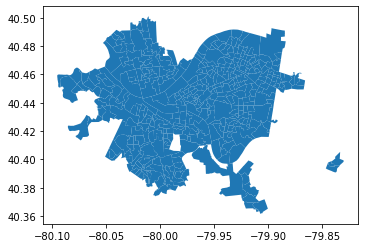

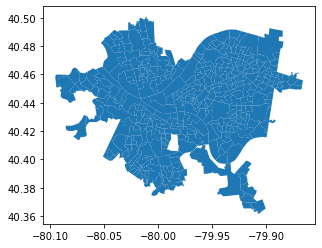

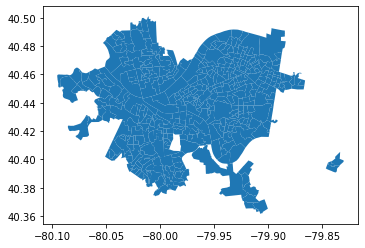

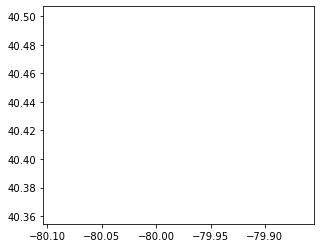

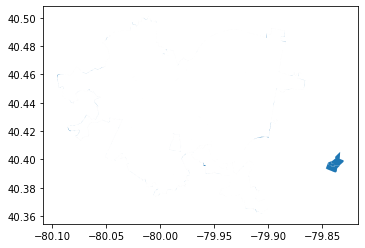

In [41]:
allegheny = gp.read_file("./raw-from-source/Alleghany/Allegheny_County_Voting_District_Boundaries-shp/Allegheny_County_Voting_District_Boundaries.shp")

census_pitt = shapefiles_census[(shapefiles_census["COUNTYFP"]=="003") & (shapefiles_census["NAME"].str.contains("PITTSBURGH"))]
census_pitt.plot()

county_pitt = allegheny[allegheny["LABEL"]=="Pittsburgh"]
county_pitt = county_pitt.to_crs(census_pitt.crs)
county_pitt.plot()

vest_pitt = vest_pa_18[vest_pa_18["NAME"].str.contains("PITTSBURGH")]
vest_pitt.plot()


gp.overlay(census_pitt,vest_pitt,how="symmetric_difference").plot()
gp.overlay(county_pitt,vest_pitt,how="symmetric_difference").plot()

In [42]:
pivoted_2018["shp_join"]=pivoted_2018["cty_pct"].str[0:9]

In [43]:
print(pivoted_2018.head())

                 cty_pct  G18GOVGGLO  G18GOVLKRA  G18GOVRWAG  G18GOVDWOL  \
0   001000010ABBOTTSTOWN           2           2         185         120   
1  001000020ARENDTSVILLE           2           4         172         160   
2  001000030BENDERSVILLE           2           3          98          76   
3       001000040BERWICK           5           9         554         318   
4   001000050BIGLERVILLE           2           5         215         168   

   G18USSRBAR  G18USSDCAS  G18USSGGAL  G18USSLKER county   unique_vote_id  \
0         183         120           2           5    001   12018352120185   
1         178         151           3           6    001   15117863160172   
2         103          74           2           1    001      74103127698   
3         575         289           5          14    001  289575145318554   
4         231         152           7           3    001   15223137168215   

    shp_join  
0  001000010  
1  001000020  
2  001000030  
3  001000040  
4  00

In [44]:
def shp_combiner(new_name,merge_list):
    global shapefiles_census
    prec_holder = []
    countyfp = new_name[0:3]
    vtdst = new_name[3:9] 
    name = new_name[9:]
    for i in merge_list:
        shapefiles_census.loc[shapefiles_census["cty_pct"]==i,:].plot()
        prec_holder.append(shapefiles_census.loc[shapefiles_census["cty_pct"]==i,:])
    new_geom = pd.concat(prec_holder, ignore_index=True).unary_union
    new_prec = gp.GeoDataFrame(geometry=[new_geom],columns=shapefiles_census.columns,crs = shapefiles_census.crs)
    new_prec["COUNTYFP"] = countyfp
    new_prec["VTDST"] = vtdst
    new_prec["NAME"] = name
    new_prec["cty_pct"] = countyfp+vtdst+name
    new_prec["shp_join"] = countyfp+vtdst
    shapefiles_census = shapefiles_census.append(new_prec)
    shapefiles_census = shapefiles_census[~(shapefiles_census["cty_pct"].isin(merge_list))]

003
00F397
SOUTH FAYETTE DISTRICT 03
  COUNTYFP   VTDST                       NAME  \
0      003  00F397  SOUTH FAYETTE DISTRICT 03   

                                            geometry  \
0  POLYGON Z ((-80.19585 40.38097 0.00000, -80.19...   

                              cty_pct   shp_join  
0  00300F397SOUTH FAYETTE DISTRICT 03  00300F397  
003
00F408
SOUTH FAYETTE DISTRICT 05
  COUNTYFP   VTDST                       NAME  \
0      003  00F408  SOUTH FAYETTE DISTRICT 05   

                                            geometry  \
0  POLYGON Z ((-80.17318 40.33738 0.00000, -80.17...   

                              cty_pct   shp_join  
0  00300F408SOUTH FAYETTE DISTRICT 05  00300F408  
019
000355
CRANBERRY DISTRICT EAST DIVISION 02
  COUNTYFP   VTDST                                 NAME  \
0      019  000355  CRANBERRY DISTRICT EAST DIVISION 02   

                                            geometry  \
0  POLYGON Z ((-80.07473 40.69144 0.00000, -80.07...   

                   

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


  COUNTYFP   VTDST                                  NAME  \
0      029  000915  PHOENIXVILLE WARD MIDDLE PRECINCT 01   

                                            geometry  \
0  POLYGON Z ((-75.52149 40.13263 0.00000, -75.52...   

                                         cty_pct   shp_join  
0  029000915PHOENIXVILLE WARD MIDDLE PRECINCT 01  029000915  
041
000600
NORTH MIDDLETON PRECINCT 01
  COUNTYFP   VTDST                         NAME  \
0      041  000600  NORTH MIDDLETON PRECINCT 01   

                                            geometry  \
0  POLYGON Z ((-77.20450 40.28708 0.00000, -77.20...   

                                cty_pct   shp_join  
0  041000600NORTH MIDDLETON PRECINCT 01  041000600  
041
000620
NORTH MIDDLETON PRECINCT 03
  COUNTYFP   VTDST                         NAME  \
0      041  000620  NORTH MIDDLETON PRECINCT 03   

                                            geometry  \
0  POLYGON Z ((-77.18825 40.25102 0.00000, -77.18...   

                          

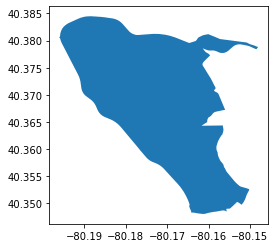

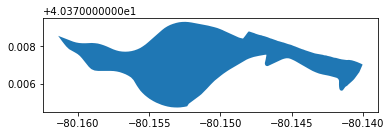

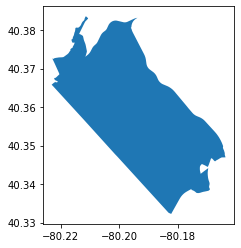

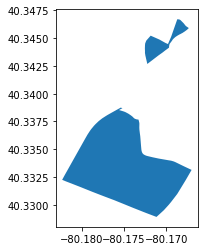

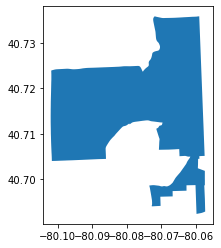

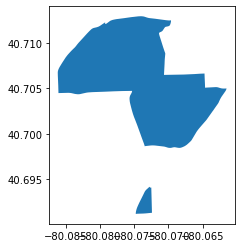

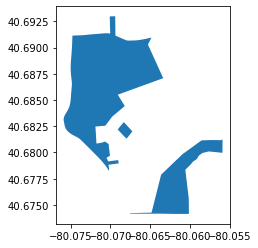

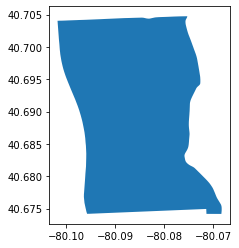

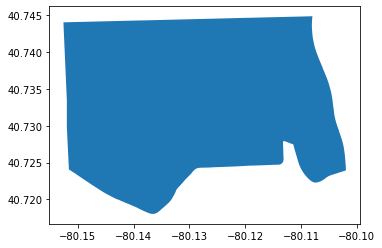

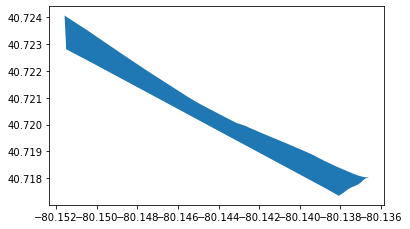

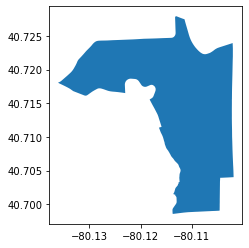

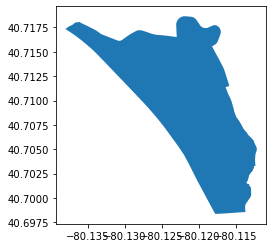

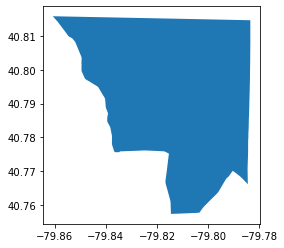

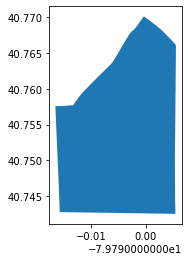

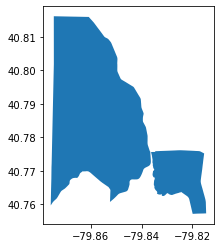

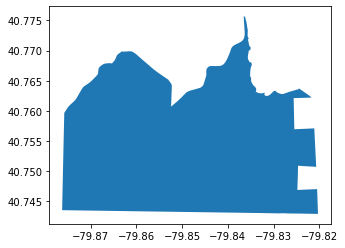

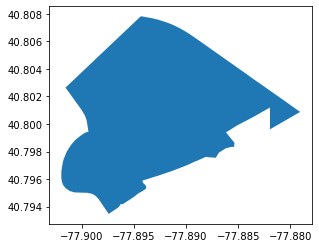

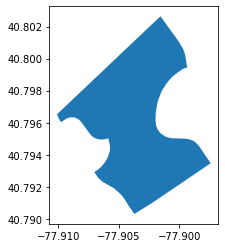

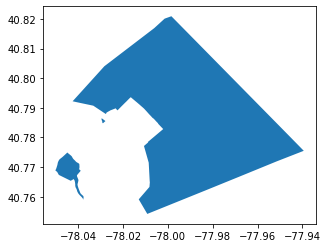

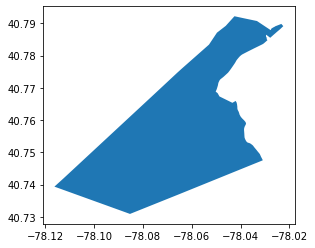

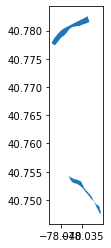

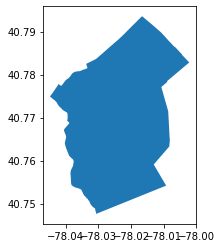

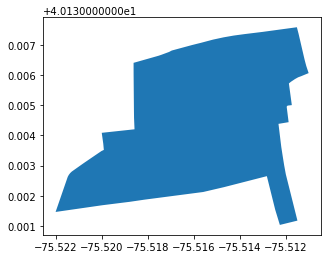

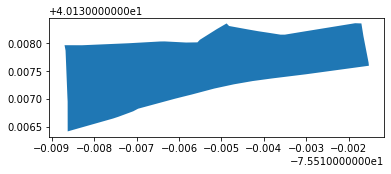

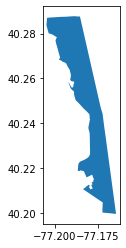

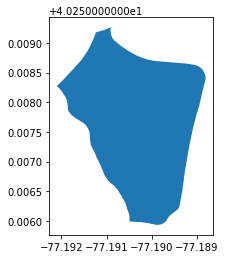

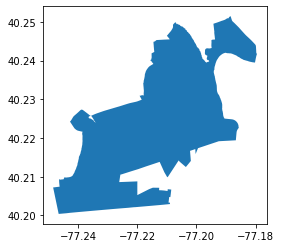

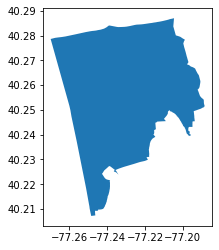

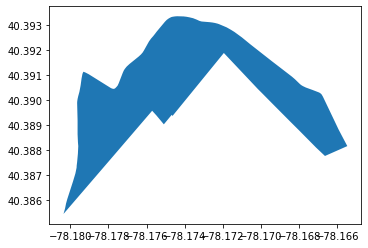

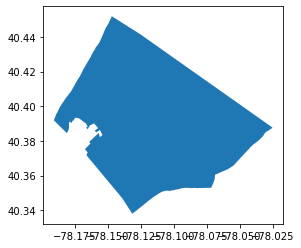

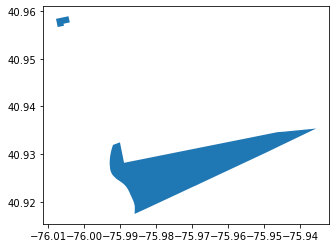

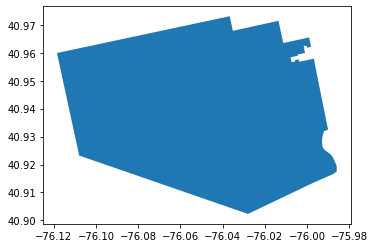

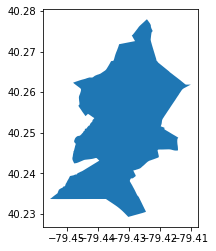

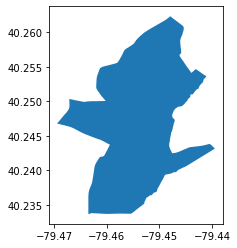

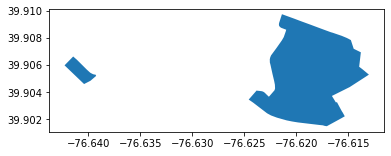

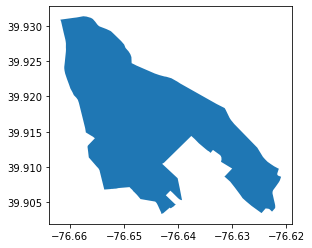

In [47]:
shp_combiner('00300F397SOUTH FAYETTE DISTRICT 03',['00300F398SOUTH FAYETTE DISTRICT 03 (CD 17)','00300F399SOUTH FAYETTE DISTRICT 03 (CD 18)'])
shp_combiner('00300F408SOUTH FAYETTE DISTRICT 05',['00300F409SOUTH FAYETTE DISTRICT 05 (CD 17)','00300F412SOUTH FAYETTE DISTRICT 05 (CD 18)'])
shp_combiner('019000355CRANBERRY DISTRICT EAST DIVISION 02',['019000353CRANBERRY DISTRICT EAST DIVISION 02 (CD 16)','019000354CRANBERRY DISTRICT EAST DIVISION 02 (CD 17)'])
shp_combiner('019000357CRANBERRY DISTRICT EAST DISTRICT 03',['019000358CRANBERRY DISTRICT EAST DISTRICT 03 (CD 16)','019000359CRANBERRY DISTRICT EAST DISTRICT 03 (CD 17)'])
shp_combiner('019000361CRANBERRY DISTRICT WEST DIVISION 01',['019000362CRANBERRY DISTRICT WEST DIVISION 01 (CD 16)','019000363CRANBERRY DISTRICT WEST DIVISION 01 (CD 17)'])
shp_combiner('019000365CRANBERRY DISTRICT WEST DIVISION 02',['019000366CRANBERRY DISTRICT WEST DIVISION 02 (CD 16)','019000367CRANBERRY DISTRICT WEST DIVISION 02 (CD 17)'])
shp_combiner('019000545JEFFERSON DISTRICT I',['019000546JEFFERSON DISTRICT I (CD 15)','019000547JEFFERSON DISTRICT I (CD 16)'])
shp_combiner('019000555JEFFERSON DISTRICT II',['019000556JEFFERSON DISTRICT II (CD 15)','019000557JEFFERSON DISTRICT II (CD 16)'])
shp_combiner('027000210FERGUSON DISTRICT NORTHEAST DIVISION 01',['027000212FERGUSON DISTRICT NORTHEAST DIVISION 01 A','027000214FERGUSON DISTRICT NORTHEAST DIVISION 01 B'])
shp_combiner('027000262HALFMOON PRECINCT Proper',['027000261HALFMOON PRECINCT Proper (CD 12)','027000263HALFMOON PRECINCT Proper (CD 15)'])
shp_combiner('027000268HALFMOON PRECINCT East Central',['027000265HALFMOON PRECINCT East Central (CD 15)','027000264HALFMOON PRECINCT East Central (CD 12)'])
shp_combiner('029000915PHOENIXVILLE WARD MIDDLE PRECINCT 01',['029000917PHOENIXVILLE WARD MIDDLE PRECINCT 01 (HD 157)','029000919PHOENIXVILLE WARD MIDDLE PRECINCT 01 (HD 155)'])
shp_combiner('041000600NORTH MIDDLETON PRECINCT 01',['041000601NORTH MIDDLETON PRECINCT 01 (CD 10)','041000602NORTH MIDDLETON PRECINCT 01 (CD 13)'])
shp_combiner('041000620NORTH MIDDLETON PRECINCT 03',['041000621NORTH MIDDLETON PRECINCT 03 (CD 10)','041000622NORTH MIDDLETON PRECINCT 03 (CD 13)'])
shp_combiner('061000380PENN',['061000381PENN PRECINCT B (9th Cong)','061000379PENN PRECINCT A (5th Cong)'])
shp_combiner('079000805HAZLE DISTRICT 01',['079000806HAZLE DISTRICT 01 (CD 08)','079000807HAZLE DISTRICT 01 (CD 09)'])
shp_combiner('129002850UNITY DISTRICT PLEASANT UNITY',['129002851UNITY DISTRICT PLEASANT UNITY (CD 13)','129002852UNITY DISTRICT PLEASANT UNITY (CD 14)'])
shp_combiner('133001429YORK WARD 05 PRECINCT 03',['133001428YORK WARD 05 PRECINCT 03 (CD 11)','133001427YORK WARD 05 PRECINCT 03 (CD 10)'])

In [70]:
merge_two = pd.merge(pivoted_2018,shapefiles_census,how="outer",on="shp_join",indicator=True)

print(merge_two["_merge"].value_counts())
right_only = merge_two[merge_two["_merge"]=="right_only"]
left_only = merge_two[merge_two["_merge"]=="left_only"]
right_only.to_csv("./shp_join_shapefiles.csv")
left_only.to_csv("./shp_join_elections.csv")

both          9150
right_only      11
left_only        6
Name: _merge, dtype: int64


In [411]:
print(pivoted_2018[pivoted_2018["cty_pct"].str.contains("GREENFIELD")])
print(vest_pa_18[vest_pa_18["NAME"].str.contains("GREENFIELD")])

                              cty_pct  G18GOVGGLO  G18GOVLKRA  G18GOVRWAG  \
1866  013000580GREENFIELD DISTRICT 01           2           1         356   
1867  013000590GREENFIELD DISTRICT 02           2           1          47   
1868  013000600GREENFIELD DISTRICT 03           4           4         463   
3949              049000940GREENFIELD           5           7         405   
4469              069000820GREENFIELD           8           5         496   

      G18GOVDWOL  G18USSRBAR  G18USSDCAS  G18USSGGAL  G18USSLKER county  \
1866         115         343         116           2           2    013   
1867          13          45          16           0           1    013   
1868         139         450         147           2           1    013   
3949         297         389         311           6           6    049   
4469         517         547         465           8           8    069   

      unique_vote_id   shp_join  
1866  11634322115356  013000580  
1867      16451013

<AxesSubplot:>

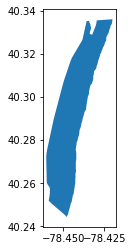

In [408]:
vest_pa_18[vest_pa_18["NAME"].str.contains("GREENFIELD DISTRICT 01")].plot()

AttributeError: 'PatchCollection' object has no property 'set_title'

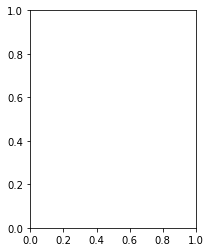

In [416]:
shapefiles_census[shapefiles_census["NAME"].str.contains("GREENFIELD DISTRICT 01")].plot()
shapefiles_census[shapefiles_census["NAME"].str.contains("GREENFIELD DISTRICT 02")].plot()
shapefiles_census[shapefiles_census["NAME"].str.contains("GREENFIELD DISTRICT 03")].plot()

In [71]:
merge_two.drop(['cty_pct_y'], axis=1,inplace=True)
merge_two.rename(columns={"cty_pct_x":"cty_pct"},inplace=True)
merge_two = merge_two[['COUNTYFP','VTDST', 'NAME','G18USSDCAS','G18USSRBAR',
                      'G18USSLKER','G18USSGGAL','G18GOVDWOL','G18GOVRWAG','G18GOVLKRA',
                      'G18GOVGGLO','geometry','cty_pct','_merge']]

In [357]:
vest_pa_18.head()

,STATEFP,COUNTYFP,VTDST,NAME,G18USSDCAS,G18USSRBAR,G18USSLKER,G18USSGGAL,G18GOVDWOL,G18GOVRWAG,G18GOVLKRA,G18GOVGGLO,geometry,unique_vote_id,cty_pct
0,42,001,000010,ABBOTTSTOWN,120,183,5,2,120,185,2,2,"POLYGON Z ((-76.99801 39.88359 0.00000, -76.99...",12018352120185,001000010ABBOTTSTOWN
1,42,001,000020,ARENDTSVILLE,151,178,6,3,160,172,4,2,"POLYGON Z ((-77.31141 39.92625 0.00000, -77.30...",15117863160172,001000020ARENDTSVILLE
2,42,001,000030,BENDERSVILLE,74,103,1,2,76,98,3,2,"POLYGON Z ((-77.25596 39.98075 0.00000, -77.25...",74103127698,001000030BENDERSVILLE
3,42,001,000040,BERWICK,289,575,14,5,318,554,9,5,"MULTIPOLYGON Z (((-76.99558 39.88677 0.00000, ...",289575145318554,001000040BERWICK
4,42,001,000050,BIGLERVILLE,152,231,3,7,168,215,5,2,"POLYGON Z ((-77.25594 39.93043 0.00000, -77.25...",15223137168215,001000050BIGLERVILLE


### Final Join

In [76]:
final_merge = pd.merge(merge_two[merge_two["_merge"]=="both"],vest_pa_18,how="outer",on="cty_pct",indicator="final_merge")

In [77]:
final_merge["final_merge"].value_counts()

both          9150
right_only      10
left_only        0
Name: final_merge, dtype: int64

In [79]:
print(final_merge[final_merge["final_merge"]=="right_only"]["cty_pct"])

9150                                  0111578P1ADAMSTOWN
9151                                  049999999LAKE ERIE
9152                       097000871UPPER MAHANOY(CD 09)
9153                                    111000010ADDISON
9154                                    111000020ADDISON
9155    091001086HORSHAM DISTRICT 02 DIVISION 02 A (S07)
9156          091001084HORSHAM DISTRICT 02 DIVISION 02 B
9157                    091002194PERKIOMEN DISTRICT 01 A
9158              091002196PERKIOMEN DISTRICT 01 B (S07)
9159          091002492PLYMOUTH DISTRICT 02 DIVISION 03B
Name: cty_pct, dtype: object


### Join Merged Sourcefile to VEST

In [370]:
both = final_merge[final_merge["final_merge"]=="both"]
source_geoms = gp.GeoDataFrame(both,geometry="geometry_x",crs=vest_pa_18.crs)
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_y",crs=vest_pa_18.crs)
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

True     6123
False    3027
dtype: int64


In [371]:
print(vals.value_counts())
print(source_geoms[~vals].shape)
print(vest_geoms[~vals].shape)

True     6123
False    3027
dtype: int64
(3027, 29)
(3027, 29)


In [372]:
type(source_geoms[~vals])


geopandas.geodataframe.GeoDataFrame

In [373]:
print(vals[vals==False].index)

Int64Index([  11,   13,   17,   18,   53,   57,   60,   61,   62,   67,
            ...
            9127, 9128, 9137, 9138, 9139, 9140, 9142, 9146, 9147, 9148],
           dtype='int64', length=3027)


In [374]:
len(source_geoms[~vals])

3027

In [375]:
test_geoms = gp.overlay(source_geoms,vest_geoms,how='symmetric_difference',keep_geom_type=False)
test_geoms_2 = gp.overlay(source_geoms,vest_geoms,how='symmetric_difference',keep_geom_type=True)

KeyboardInterrupt: 

In [ ]:
print(test_geoms.shape)
print(test_geoms_2.shape)

In [ ]:
print(test_geoms.head())
print(test_geoms_2.head())

for val in list(test_geoms["VTDST_x_1"]):
    if val not in list(test_geoms_2["VTDST_x_1"]):
        print(val)

In [ ]:
test_geoms[test_geoms["VTDST_x_1"]=="001230"].iloc[[0]].plot()

In [ ]:
    ax = source_geoms[~vals].iloc[[2]].exterior.plot(color = "red",)
    vest_geoms[~vals].iloc[[2]].exterior.plot(color = "blue", ax = ax)

In [ ]:
print(np.unique(vest_geoms.index == source_geoms.index))


In [391]:
source_geoms[~vals].iat[i,2]

'ELIZABETH WARD 01 DISTRICT 02'

1) For ELIZABETH WARD 01 DISTRICT 02 difference in area is 2.5420949173557696
2) For ELIZABETH WARD 06 DISTRICT 02 difference in area is 2.037578024146162
3) For GREENFIELD DISTRICT 01 difference in area is 6.0637908483926495
4) For GREENFIELD DISTRICT 02 difference in area is 6.123148894970397
5) For ATHENS DISTRICT 01 difference in area is 21.090232852946937
6) For ATHENS DISTRICT 02 difference in area is 21.09023285294694
7) For ADAMS DISTRICT ST. MICHAEL difference in area is 2.8652991634448464
8) For CAMBRIA DISTRICT REVLOC difference in area is 2.1201581867643657
9) For CAMBRIA DISTRICT 01 difference in area is 9.869298162648409
10) For CAMBRIA DISTRICT 04 difference in area is 2.6935141018270956
11) For CAMBRIA DISTRICT COLVER difference in area is 5.055626188357371
12) For JACKSON DISTRICT VINCO difference in area is 6.553593618030251
13) For JACKSON DISTRICT 01 difference in area is 6.11573403311768
14) For JACKSON DISTRICT 03 difference in area is 11.535703894324453
15) For W

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:384: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


23) For METAL DISTRICT 01 difference in area is 3.6086389379040873
24) For METAL DISTRICT 02 difference in area is 2.0279963881611325
25) For MONONGAHELA DISTRICT 01 difference in area is 7.736306712029984
26) For MONONGAHELA DISTRICT 02 difference in area is 7.90404376796696
27) For UNION DISTRICT GREEN PT. difference in area is 5.3891926082138975
28) For UNION DISTRICT LICKDALE difference in area is 5.389192608253322
29) For FOSTER DISTRICT 01 difference in area is 4.976348187671521
30) For FOSTER DISTRICT 02 difference in area is 4.976347493991117
31) For KEATING DISTRICT 01 difference in area is 2.568938578837493
32) For KEATING DISTRICT 03 difference in area is 2.4878227108582136
33) For BROWN difference in area is 14.444616593274512
34) For LOWER MOUNT BETHEL DISTRICT LOWER difference in area is 3.424351004531627
35) For LOWER MOUNT BETHEL DISTRICT UPPER difference in area is 3.424350613139683
36) For UPPER AUGUSTA DISTRICT NORTHEAST difference in area is 2.0436073773809817
37) F

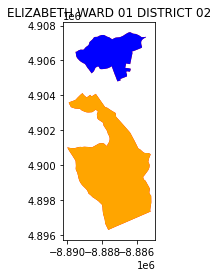

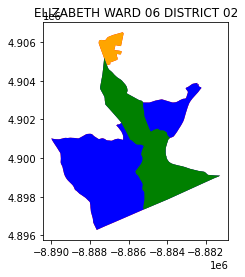

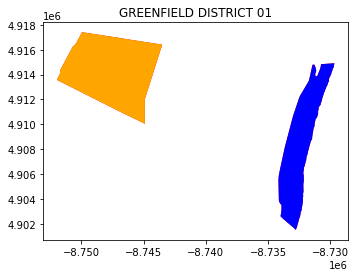

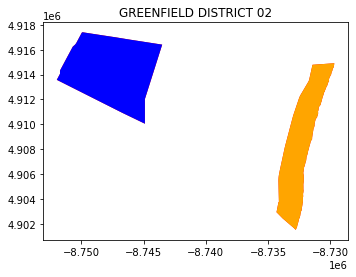

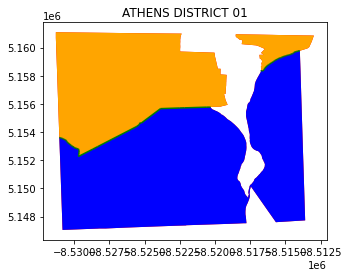

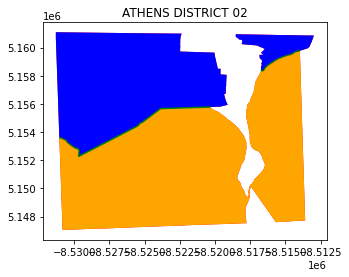

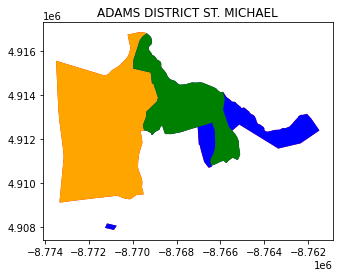

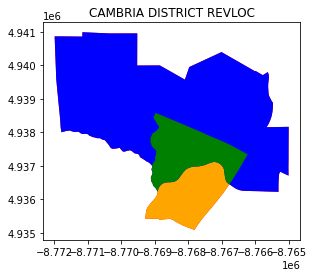

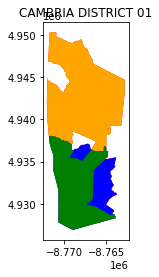

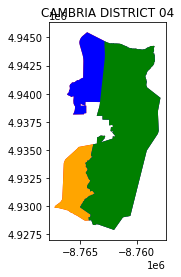

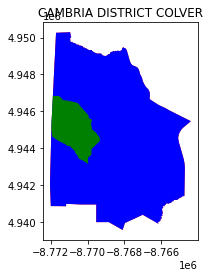

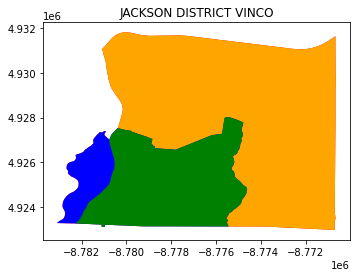

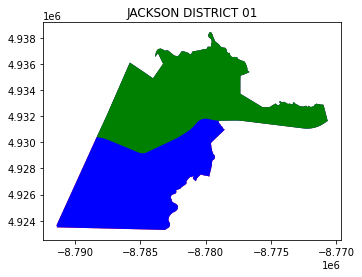

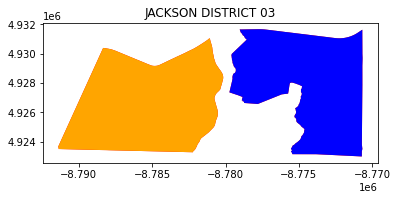

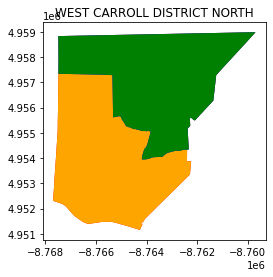

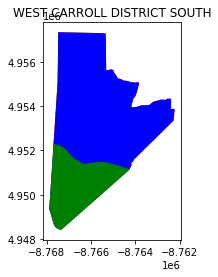

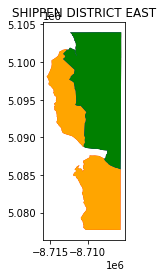

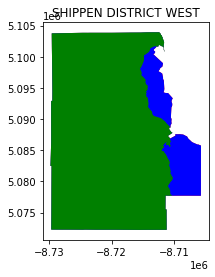

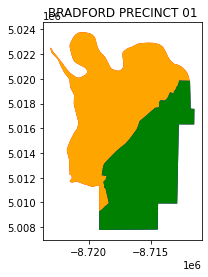

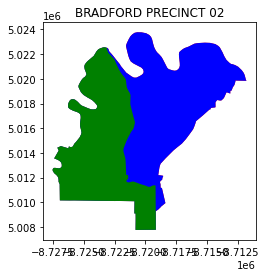

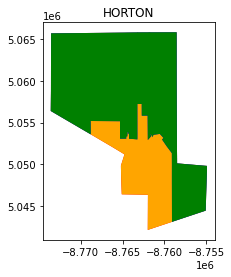

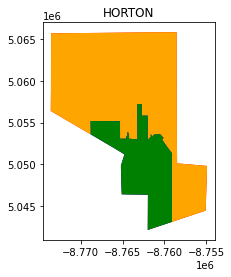

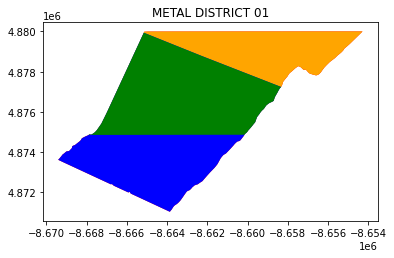

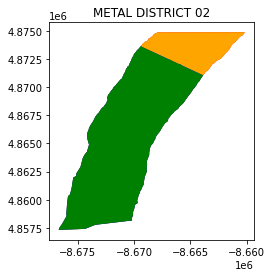

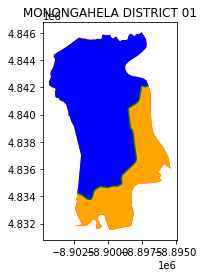

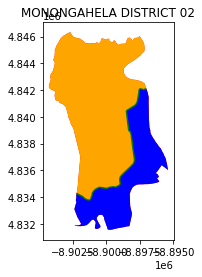

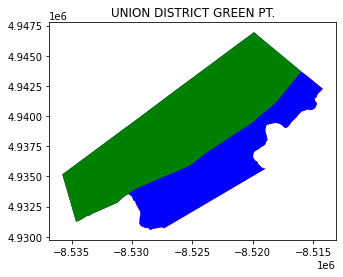

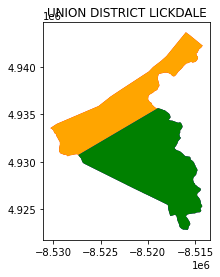

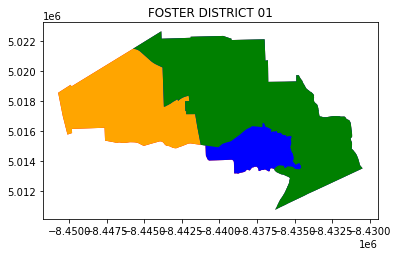

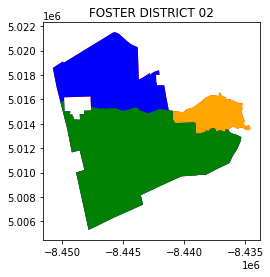

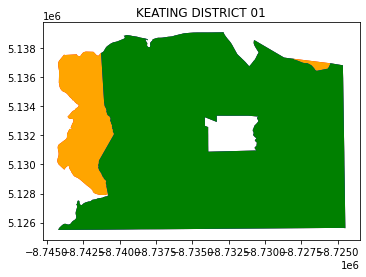

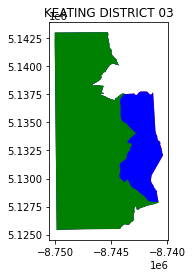

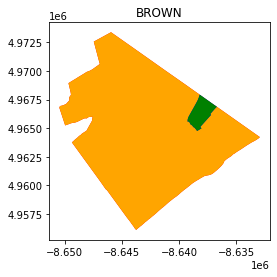

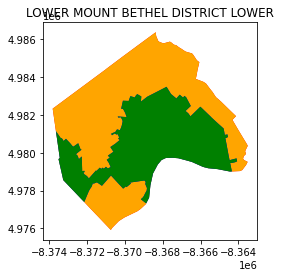

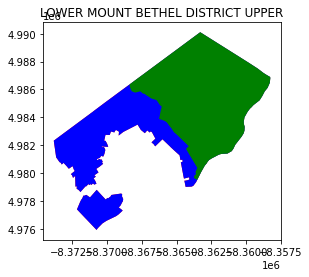

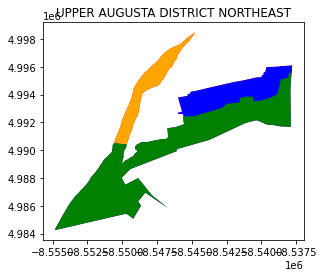

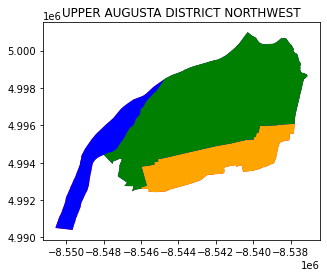

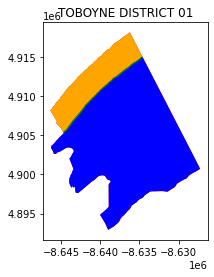

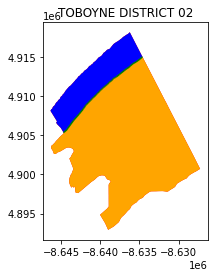

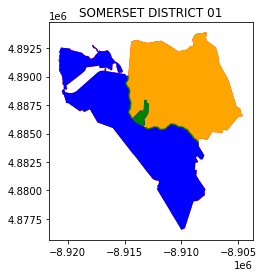

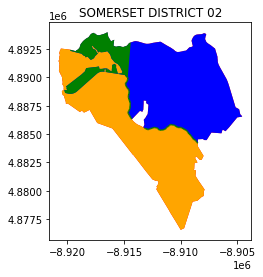

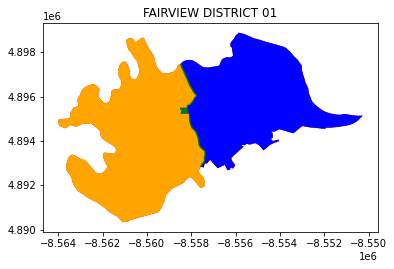

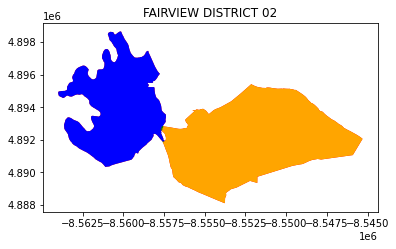

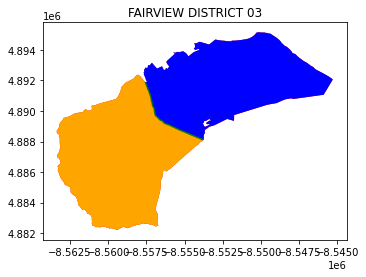

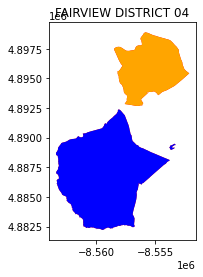

In [424]:
count = 0
for i in range(0,len(source_geoms[~vals])):
    diff = source_geoms[~vals].iloc[[i]].symmetric_difference(vest_geoms[~vals].iloc[[i]])
    intersection = source_geoms[~vals].iloc[[i]].intersection(vest_geoms[~vals].iloc[[i]])
    area = float(diff.area/10e6)
    #print("Area is " + str(area))
    if (area > 2):
        count += 1
        name = source_geoms[~vals].iat[i,2]
        print(str(count)+") For " + name + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms[~vals].iloc[[i]].plot(color="orange",ax=base)
            vest_geoms[~vals].iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms[~vals].iloc[[i]].plot(color="orange",ax=base)
            vest_geoms[~vals].iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [346]:
if(~(source_geoms[~vals].iloc[[0]].intersection(vest_geoms[~vals].iloc[[0]])).iloc[0].is_empty):
    print("Not empty")

Not empty


[]

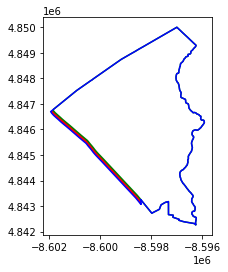

In [326]:
diff = source_geoms[~vals].iloc[[0]].symmetric_difference(vest_geoms[~vals].iloc[[0]])
ax = diff.plot(color="red")
ax_2 = source_geoms[~vals].iloc[[0]].exterior.plot(color="green",ax=ax)
ax_3 = vest_geoms[~vals].iloc[[0]].exterior.plot(color="blue",ax=ax)
ax.plot()

In [271]:
print(source_geoms[~vals].iloc[[0]])

   COUNTYFP_x VTDST_x                  NAME_x  G18USSDCAS_x  G18USSRBAR_x  \
11        001  000110  CUMBERLAND DISTRICT 01         495.0         456.0   

    G18USSLKER_x  G18USSGGAL_x  G18GOVDWOL_x  G18GOVRWAG_x  G18GOVLKRA_x  ...  \
11           8.0           3.0         533.0         422.0           5.0  ...   

    G18USSRBAR_y G18USSLKER_y G18USSGGAL_y G18GOVDWOL_y G18GOVRWAG_y  \
11           456            8            3          533          422   

   G18GOVLKRA_y G18GOVGGLO_y  \
11            5            2   

                                           geometry_y  unique_vote_id  \
11  POLYGON Z ((-77.24076 39.84232 0.00000, -77.24...  49545683533422   

    final_merge  
11         both  

[1 rows x 29 columns]


0    0.0
dtype: float64


/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:407: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  warnings.warn(


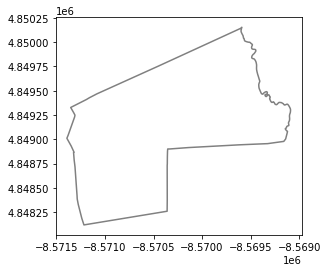

In [273]:
diff = source_geoms.iloc[[0]].symmetric_difference(vest_geoms.iloc[[0]])
ax = source_geoms.iloc[[0]].intersection(vest_geoms.iloc[[0]])
ax_2 = diff.plot()
ax.exterior.plot(color="grey",ax=ax_2)

print(diff.area/10e6)

11    0.058154
dtype: float64


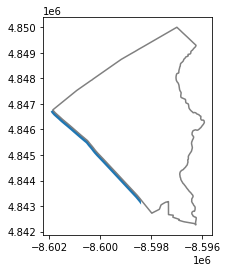

In [269]:
ax = source_geoms[~vals].iloc[[0]].intersection(vest_geoms[~vals].iloc[[0]])
diff = source_geoms[~vals].iloc[[0]].symmetric_difference(vest_geoms[~vals].iloc[[0]])
ax_2 = diff.plot()

ax.exterior.plot(color="grey",ax=ax_2)

print(diff.area/10e6)

<AxesSubplot:>

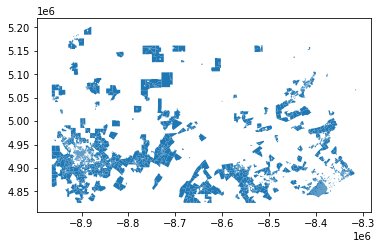

In [124]:
vest_geoms[~vals].plot()

In [145]:
sym_diff = gp.overlay(source_geoms[~vals],vest_geoms[~vals],how='symmetric_difference',keep_geom_type=False)
sym_diff_2 = gp.overlay(source_geoms[~vals],vest_geoms[~vals],how='symmetric_difference',keep_geom_type=True)

In [264]:
print(sym_diff[sym_diff["NAME_x_1"]=="FRANKLIN DISTRICT 01"])

Empty GeoDataFrame
Columns: [COUNTYFP_x_1, VTDST_x_1, NAME_x_1, G18USSDCAS_x_1, G18USSRBAR_x_1, G18USSLKER_x_1, G18USSGGAL_x_1, G18GOVDWOL_x_1, G18GOVRWAG_x_1, G18GOVLKRA_x_1, G18GOVGGLO_x_1, cty_pct_1, _merge_1, STATEFP_1, COUNTYFP_y_1, VTDST_y_1, NAME_y_1, G18USSDCAS_y_1, G18USSRBAR_y_1, G18USSLKER_y_1, G18USSGGAL_y_1, G18GOVDWOL_y_1, G18GOVRWAG_y_1, G18GOVLKRA_y_1, G18GOVGGLO_y_1, geometry_y, unique_vote_id_1, final_merge_1, COUNTYFP_x_2, VTDST_x_2, NAME_x_2, G18USSDCAS_x_2, G18USSRBAR_x_2, G18USSLKER_x_2, G18USSGGAL_x_2, G18GOVDWOL_x_2, G18GOVRWAG_x_2, G18GOVLKRA_x_2, G18GOVGGLO_x_2, geometry_x, cty_pct_2, _merge_2, STATEFP_2, COUNTYFP_y_2, VTDST_y_2, NAME_y_2, G18USSDCAS_y_2, G18USSRBAR_y_2, G18USSLKER_y_2, G18USSGGAL_y_2, G18GOVDWOL_y_2, G18GOVRWAG_y_2, G18GOVLKRA_y_2, G18GOVGGLO_y_2, unique_vote_id_2, final_merge_2, geometry]
Index: []

[0 rows x 57 columns]


In [421]:
(sym_diff.area/10e6).describe()

count    2.313000e+03
mean     1.411587e-04
std      3.491046e-03
min      0.000000e+00
25%      2.024622e-16
50%      2.851916e-15
75%      1.804339e-13
max      1.173967e-01
dtype: float64

In [267]:
source_geoms[~vals].iloc[[0]]

,COUNTYFP_x,VTDST_x,NAME_x,G18USSDCAS_x,G18USSRBAR_x,G18USSLKER_x,G18USSGGAL_x,G18GOVDWOL_x,G18GOVRWAG_x,G18GOVLKRA_x,...,G18USSRBAR_y,G18USSLKER_y,G18USSGGAL_y,G18GOVDWOL_y,G18GOVRWAG_y,G18GOVLKRA_y,G18GOVGGLO_y,geometry_y,unique_vote_id,final_merge
11,001,000110,CUMBERLAND DISTRICT 01,495.0,456.0,8.0,3.0,533.0,422.0,5.0,...,456,8,3,533,422,5,2,"POLYGON Z ((-77.24076 39.84232 0.00000, -77.24...",49545683533422,both


<AxesSubplot:>

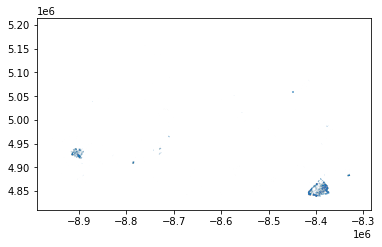

In [127]:
sym_diff.plot()

In [128]:
#file = source_geoms[~vals].symmetric_difference(vest_geoms[~vals])
#file.plot()

In [147]:
print((sym_diff_2.area).describe())

count    1.915000e+03
mean     1.704961e+03
std      3.836230e+04
min      8.673617e-19
25%      1.065787e-08
50%      5.268378e-08
75%      1.850630e-05
max      1.173967e+06
dtype: float64


In [137]:
print(sym_diff.area)

0       8.514872e-02
1       0.000000e+00
2       1.875257e-04
3       8.580784e-09
4       3.465984e-03
            ...     
2308    3.474258e-09
2309    2.503312e-06
2310    1.405241e-04
2311    1.129816e-08
2312    9.592182e-09
Length: 2313, dtype: float64


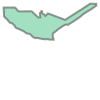

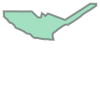

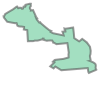

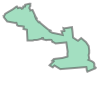

In [130]:
#Show a random difference
test = both[~vals].sample(axis=0,n=1).index[0]
display(both.iloc[test]["geometry_x"])
display(both.iloc[test]["geometry_y"])

#display(gp.overlay(both.iloc[test]["geometry_x"],both.iloc[test]["geometry_y"],how="overlap"))

test = both[~vals].sample(axis=0,n=1).index[0]
display(both.iloc[test]["geometry_x"])
display(both.iloc[test]["geometry_y"])

In [67]:
print(final_merge[final_merge["final_merge"]=="both"][~vals]["geometry_x"])
print(final_merge[final_merge["final_merge"]=="both"][~vals]["geometry_y"])

11      POLYGON Z ((-77.27181 39.86794 0.00000, -77.27...
13      POLYGON Z ((-77.29616 39.84340 0.00000, -77.29...
17      POLYGON Z ((-77.46876 39.90392 0.00000, -77.46...
18      POLYGON Z ((-77.47109 39.94408 0.00000, -77.46...
53      POLYGON Z ((-80.07515 40.50545 0.00000, -80.07...
                              ...                        
9140    POLYGON Z ((-76.72395 39.92779 0.00000, -76.72...
9142    POLYGON Z ((-76.71679 39.90024 0.00000, -76.71...
9146    POLYGON Z ((-76.68961 39.93282 0.00000, -76.68...
9147    POLYGON Z ((-76.68404 39.91529 0.00000, -76.68...
9148    POLYGON Z ((-76.63926 39.90524 0.00000, -76.63...
Name: geometry_x, Length: 2537, dtype: geometry
11      POLYGON Z ((-77.24076 39.84232 0.00000, -77.24...
13      POLYGON Z ((-77.27261 39.86744 0.00000, -77.27...
17      POLYGON Z ((-77.46876 39.90392 0.00000, -77.46...
18      POLYGON Z ((-77.47109 39.94408 0.00000, -77.46...
53      POLYGON Z ((-80.07515 40.50545 0.00000, -80.07...
                        

In [68]:
print(shapefiles_census.head())
print(vest_pa_18.head())

merged_source_2 = pd.merge(merged_source,vest_pa_18,how="outer",on="cty_pct",indicator="second_merge")

print(merged_source_2["second_merge"].value_counts())

merged_source_2.to_csv("./big_merge.csv")

  COUNTYFP   VTDST          NAME  \
0      001  000010   ABBOTTSTOWN   
1      001  000020  ARENDTSVILLE   
2      001  000030  BENDERSVILLE   
3      001  000040       BERWICK   
4      001  000050   BIGLERVILLE   

                                            geometry                cty_pct  \
0  POLYGON Z ((-76.99801 39.88359 0.00000, -76.99...   001000010ABBOTTSTOWN   
1  POLYGON Z ((-77.31141 39.92625 0.00000, -77.30...  001000020ARENDTSVILLE   
2  POLYGON Z ((-77.25596 39.98075 0.00000, -77.25...  001000030BENDERSVILLE   
3  MULTIPOLYGON Z (((-76.99558 39.88677 0.00000, ...       001000040BERWICK   
4  POLYGON Z ((-77.25594 39.93043 0.00000, -77.25...   001000050BIGLERVILLE   

    shp_join  
0  001000010  
1  001000020  
2  001000030  
3  001000040  
4  001000050  
  STATEFP COUNTYFP   VTDST          NAME  G18USSDCAS  G18USSRBAR  G18USSLKER  \
0      42      001  000010   ABBOTTSTOWN         120         183           5   
1      42      001  000020  ARENDTSVILLE         151      

NameError: name 'merged_source' is not defined

#### Merge Election Results w/ final

In [ ]:
vest_pa_18.rename(columns={"join_col_vest":"cty_pct"},inplace=True)

name_check = pd.merge(merged_source[merged_source["_merge"]=="both"],vest_pa_18,how="outer",on="join_col",indicator="merge")

print(name_check["merge"].value_counts())
right_only = name_check[name_check["merge"]=="right_only"]
left_only = name_check[name_check["merge"]=="left_only"]
both = name_check[name_check["merge"]=="both"]

In [ ]:
print(both["COUNTYFP_y"].value_counts())
print(left_only["county"].value_counts())

In [ ]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff != 0):
                #print(df.iloc[j]['countypct'])
                #print(i)
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]['join_col'])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    print("New max diff is: ", str(max_diff))
                    print(df.iloc[j]['join_col'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]['join_col'])
        else:
            matching_rows +=1
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)

In [ ]:
validater_row(both,col_list)

In [ ]:
count_vals = vest_pa_18["join_col"].value_counts().to_frame()

In [ ]:
print(len(count_vals[count_vals["join_col"]==2]))